# Mecánica de Medios Continuos
## Por Jorge I. Zuluaga
### Cuadernos de exploración numérica

## Modelos Atmosféricos

Propiedades de la atmósfera de la Tierra:

In [1]:
atm=101.325e3 # Pa
po=1*atm 
ρo=1.225 # kg/m^3
go=9.80665 # m/s^2
ho=po/(ρo*go)
print(f"Escala vertical de la atmósfera barotrópica: {ho/1e3} km")

Escala vertical de la atmósfera barotrópica: 8.434509818774577 km


### Modelo incompresible

In [2]:
import numpy as np
hmax=20e3 # m
zs=np.linspace(0,hmax,100) # m
ps_inc=po-ρo*go*zs
ρs_inc=ρo*np.ones_like(ps_inc)

Gráfico normal:

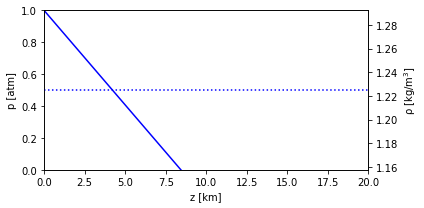

In [3]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(6,3))
ax.plot(zs/1e3,ps_inc/atm,'b-')
axd=ax.twinx()
axd.plot(zs/1e3,ρs_inc,'b:')

#Decoración
ax.set_xlabel("z [km]")
ax.set_ylabel("p [atm]")
axd.set_ylabel("ρ [kg/m$^3$]")
ax.margins(0,0)
ax.set_ylim(0,1)
fig.tight_layout()

Gráfico como se acostumbra hacerlo en ciencias atmosféricas:

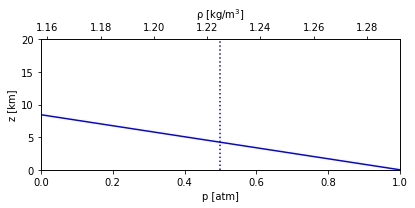

In [4]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(6,3))

#Presión
ax.plot(ps_inc/atm,zs/1e3,'b-')
#Densidad
axd=ax.twiny()
axd.plot(ρs_inc,zs/1e3,'b:')

#Decoración
ax.set_xlabel("p [atm]")
ax.set_ylabel("z [km]")
axd.set_xlabel("ρ [kg/m$^3$]")
ax.margins(0,0)
ax.set_ylim(0,hmax/1e3)
ax.set_xlim(0,1)
fig.tight_layout()

### Modelo isotérmico

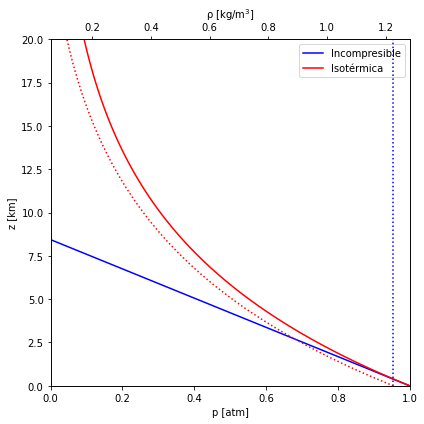

In [5]:
ps_iso=po*np.exp(-zs/ho)
ρs_iso=ρo*np.exp(-zs/ho)

fig,ax=plt.subplots(figsize=(6,6))

#Presión
ax.plot(ps_inc/atm,zs/1e3,'b-',label='Incompresible')
ax.plot(ps_iso/atm,zs/1e3,'r-',label='Isotérmica')

#Densidad
axd=ax.twiny()
axd.plot(ρs_inc,zs/1e3,'b:')
axd.plot(ρs_iso,zs/1e3,'r:')

#Decoración
ax.legend()
ax.set_xlabel("p [atm]")
ax.set_ylabel("z [km]")
axd.set_xlabel("ρ [kg/m$^3$]")
ax.margins(0,0)
ax.set_ylim(0,hmax/1e3)
ax.set_xlim(0,1)
fig.tight_layout()

### Atmósfera estándar

Una atmósfera estándar usada en la industria aeronáutica es la definida por International Civil Aviation Organization (ICAO). Este modelo puede accederse con este paquete: https://pypi.org/project/ambiance/ 

In [6]:
!python -m pip install ambiance

In [7]:
from ambiance import Atmosphere

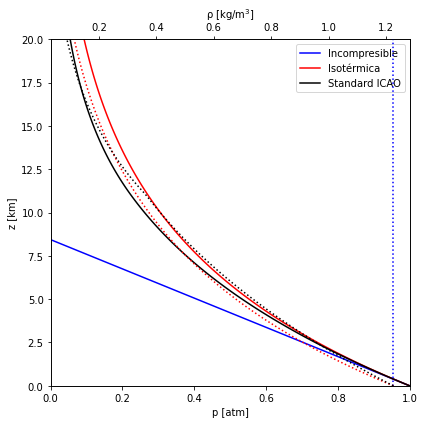

In [8]:
atmosphere=Atmosphere(zs)
ps_icao=atmosphere.pressure
ρs_icao=atmosphere.density

fig,ax=plt.subplots(figsize=(6,6))

#Presión
ax.plot(ps_inc/atm,zs/1e3,'b-',label='Incompresible')
ax.plot(ps_iso/atm,zs/1e3,'r-',label='Isotérmica')
ax.plot(ps_icao/atm,zs/1e3,'k-',label='Standard ICAO')

#Densidad
axd=ax.twiny()
axd.plot(ρs_inc,zs/1e3,'b:')
axd.plot(ρs_iso,zs/1e3,'r:')
axd.plot(ρs_icao,zs/1e3,'k:')

#Decoración
ax.legend()
ax.set_xlabel("p [atm]")
ax.set_ylabel("z [km]")
axd.set_xlabel("ρ [kg/m$^3$]")
ax.margins(0,0)
ax.set_ylim(0,hmax/1e3)
ax.set_xlim(0,1)
fig.tight_layout()

La temperatura:

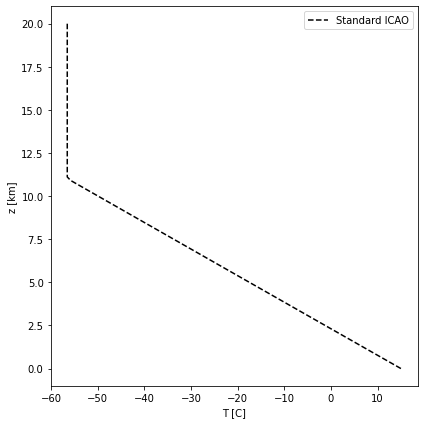

In [9]:
Ts_icao=atmosphere.temperature_in_celsius
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(Ts_icao,zs/1e3,'k--',label='Standard ICAO')

#Decoración
ax.legend()
ax.set_xlabel("T [C]")
ax.set_ylabel("z [km]")
fig.tight_layout()

### Modelo homentrópico

Propiedades asumidas para la atmósfera:

In [10]:
γ=7/5
R=8.31446261815324
To=15+273.15 #K
Mmol=29e-3 # kg/mol
cP=R*γ/(γ-1)/Mmol
h2=γ/(γ-1)*ho
dTdz=go/cP
print(f"Calor específico a presión constante: {cP} J/K/kg")
print(f"Temperature lapse rate: {dTdz*1e3} K/km")
print(f"Scale height de Temperatura: {h2/1e3} km")

Calor específico a presión constante: 1003.4696263288394 J/K/kg
Temperature lapse rate: 9.772742236232208 K/km
Scale height de Temperatura: 29.520784365711023 km


Solución a la ecuación de equilibrio hidrostático:

In [11]:
Ts_hom=To*(1-zs/h2)
ρs_hom=ρo*(1-zs/h2)**(1/(γ-1))
ps_hom=po*(1-zs/h2)**(γ/(γ-1))

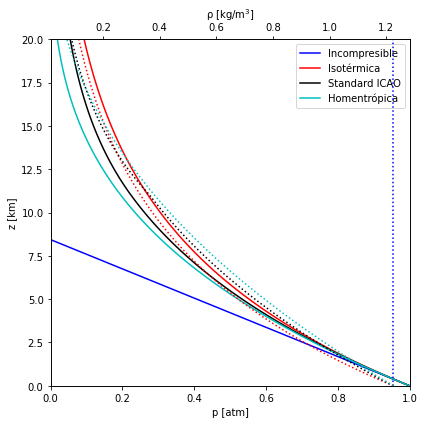

In [12]:
fig,ax=plt.subplots(figsize=(6,6))

#Presión
ax.plot(ps_inc/atm,zs/1e3,'b-',label='Incompresible')
ax.plot(ps_iso/atm,zs/1e3,'r-',label='Isotérmica')
ax.plot(ps_icao/atm,zs/1e3,'k-',label='Standard ICAO')
ax.plot(ps_hom/atm,zs/1e3,'c-',label='Homentrópica')

#Densidad
axd=ax.twiny()
axd.plot(ρs_inc,zs/1e3,'b:')
axd.plot(ρs_iso,zs/1e3,'r:')
axd.plot(ρs_icao,zs/1e3,'k:')
axd.plot(ρs_hom,zs/1e3,'c:')

#Decoración
ax.legend()
ax.set_xlabel("p [atm]")
ax.set_ylabel("z [km]")
axd.set_xlabel("ρ [kg/m$^3$]")
ax.margins(0,0)
ax.set_ylim(0,hmax/1e3)
ax.set_xlim(0,1)
fig.tight_layout()

## Atmósfera empírica

In [13]:
!python -m pip install nrlmsise00
!python -m pip install -U 'nrlmsise00[dataset]'
!python -m pip install spaceweather

     |████████████████████████████████| 90 kB 3.7 MB/s 
     |████████████████████████████████| 892 kB 5.8 MB/s 


In [14]:
from nrlmsise00.dataset import msise_4d
from datetime import datetime
import spaceweather as sw
#NRLMSISE-00 usa datos del clima espacial.  Esos datos tienen que actualizarse 
sw.update_data()

/usr/local/lib/python3.7/dist-packages/nrlmsise00/dataset/__init__.py:27: UserWarning: The xarray 4d interface is experimental.
  warn("The xarray 4d interface is experimental.", UserWarning)


In [15]:
ds = msise_4d(datetime(2021,11,30,0,0,0),zs/1e3,[0],[0])

In [16]:
ds

<xarray.Dataset>
Dimensions:  (alt: 100, lat: 1, lon: 1, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2021-11-30
  * alt      (alt) float64 0.0 0.202 0.404 0.6061 ... 19.39 19.6 19.8 20.0
  * lat      (lat) int64 0
  * lon      (lon) int64 0
Data variables: (12/15)
    He       (time, alt, lat, lon) float64 1.256e+14 1.234e+14 ... 1.017e+13
    O        (time, alt, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    N2       (time, alt, lat, lon) float64 1.872e+19 1.839e+19 ... 1.516e+18
    O2       (time, alt, lat, lon) float64 5.022e+18 4.934e+18 ... 4.066e+17
    Ar       (time, alt, lat, lon) float64 2.239e+17 2.2e+17 ... 1.813e+16
    rho      (time, alt, lat, lon) float64 0.001152 0.001131 ... 9.326e-05
    ...       ...
    Texo     (time, alt, lat, lon) float64 1.027e+03 1.027e+03 ... 1.027e+03
    Talt     (time, alt, lat, lon) float64 300.4 298.8 297.4 ... 205.2 205.8
    lst      (time, lon) float64 0.0
    Ap       (time) int32 9
    f107     (time) float64 89.8
    f107a    (time) float64 88.2

**NOTA**: la rutina `msise_4d` usa `xarray` un tipo de arreglo multidimensional muy poderoso y versatil.  Para una guía sobre el manejo de este tipo de arreglos ver http://xarray.pydata.org/en/stable/index.html. 

In [17]:
ρs_emp=np.array(ds["rho"]).flatten()
Ts_emp=np.array(ds["Talt"]).flatten()

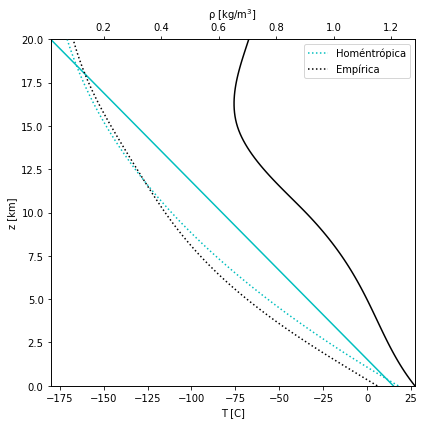

In [18]:
fig,ax=plt.subplots(figsize=(6,6))

#Presión
ax.plot(Ts_hom-273.15,zs/1e3,'c-')
ax.plot(Ts_emp-273.15,zs/1e3,'k-')

#Densidad
axd=ax.twiny()
axd.plot(ρs_hom,zs/1e3,'c:',label='Homéntrópica')
axd.plot(ρs_emp*1e3,zs/1e3,'k:',label='Empírica')

#Decoración
axd.legend()
ax.set_xlabel("T [C]")
ax.set_ylabel("z [km]")
axd.set_xlabel("ρ [kg/m$^3$]")
ax.margins(0,0)
ax.set_ylim(0,hmax/1e3)
fig.tight_layout()